In [32]:
# Load required packages
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import pandas as pd
import random
import sklearn as sk
from sklearn.linear_model import LinearRegression

In [33]:
#Read in the .dat files
montecarlo1 = np.loadtxt("mc2_1.dat")
montecarlo2 = np.loadtxt("mc2_2.dat")
montecarlo3 = np.loadtxt("mc2_3.dat")
montecarlo4 = np.loadtxt("mc2_4.dat")
montecarlo5 = np.loadtxt("mc2_5.dat")

In [34]:
# Create two atomic vectors/variables to store the dat file contents
x = montecarlo1[:,0]
y1 = montecarlo1[:,2]
y2 = montecarlo2[:,2]
y3 = montecarlo3[:,2]
y4 = montecarlo4[:,2]
y5 = montecarlo5[:,2]

In [35]:
# Smoothing out the Monte Carlo error
y_add = y1 + y2 + y3 + y4 + y5
y_mean = y_add/5 #Divide it by the number of iterations and not the number of trials

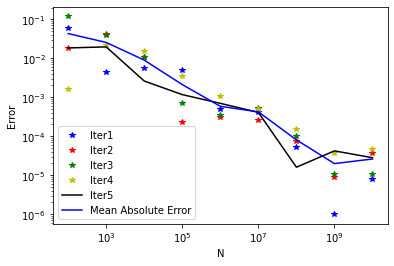

In [36]:
# Create a log-log plot
plt.loglog(x, y1,'b*',label='Iter1')
plt.loglog(x, y2,'r*',label='Iter2')
plt.loglog(x, y3,'g*',label='Iter3')
plt.loglog(x, y4,'y*',label='Iter4')
plt.loglog(x, y5,'black',label='Iter5')
plt.loglog(x, y_mean,'b',label='Mean Absolute Error')
plt.legend(loc=3)
plt.xlabel("N")
plt.ylabel("Error")
plt.savefig("montecarlo_plot.png")


In [37]:
runtime = [0.00, 0.00, 0.00, 0.00, 0.03, 0.37, 3.85, 39.87, 54.25]
runtime_array = np.asarray(runtime)
#type(runtime)
#type(runtime_array)
#print (runtime_array.dtype)
error_mean = y_mean

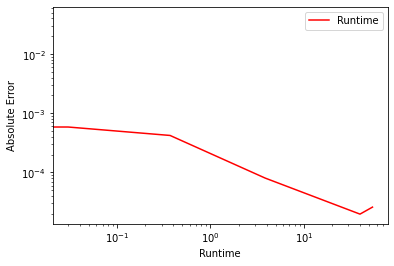

In [38]:
plt.loglog(runtime_array,error_mean,'r',label='Runtime')
plt.legend(loc=0)
plt.xlabel("Runtime")
plt.ylabel("Absolute Error")
plt.savefig("Runtime vs. Absolute Error.png")

In [39]:
# plt.loglog(error_mean,runtime_array,'r',label='Runtime')
# plt.legend(loc=0)
# plt.xlabel("Runtime")
# # plt.ylabel("Absolute Error")
# plt.savefig("Runtime vs. Absolute Error.png")

In [40]:
random.seed(123)
model = LinearRegression().fit(error_mean.reshape(len(error_mean),1),runtime_array.reshape(len(runtime_array),1))

In [41]:
model.coef_

array([[-472.08758366]])

In [42]:
model.intercept_

array([15.16696508])

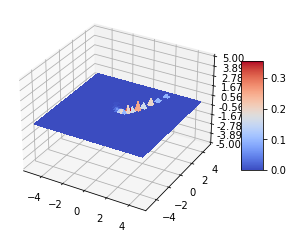

In [43]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X1 = np.arange(-5, 5, 0.25)
X2 = np.arange(-5, 5, 0.25)
X1, X2 = np.meshgrid(X1, X2)
Z = np.exp(-pow((1-X1),2) - 100 * pow((X2 - pow(X1,2)),2))

# Plot the surface.
surf = ax.plot_surface(X1, X2,Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
#ax.set_zlim(X1.all(), X2.all())
ax.set_zlim(-5,5)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.2f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()